In [53]:
import ujson
import pandas as pd
import numpy as np

In [54]:
data = None
with open("./res.json", "r") as file:
    data = ujson.load(file)

In [55]:
df = pd.DataFrame(data)

df["category"] = df["category"].apply(lambda x: np.NaN if len(x) == 0 else x)
df = df.dropna(subset=["category"])

In [56]:
bitmap_df = pd.get_dummies(df['category'].apply(pd.Series).stack()).sum(level=0)


/tmp/ipykernel_280511/734249443.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bitmap_df = pd.get_dummies(df['category'].apply(pd.Series).stack()).sum(level=0)


In [57]:
result_df = pd.concat([df, bitmap_df], axis=1)

In [58]:
result_df.drop(columns=["category"])

,name,pub_url,cu_author,date,abstract,Agricultural and Biological Sciences,Arts and Humanities,"Biochemistry, Genetics and Molecular Biology",Chemical Engineering,Chemistry,...,Material Science,Mathematics,Medicine and Dentistry,Neuroscience,Nursing and Health Professions,"Pharmacology, Toxicology and Pharmaceutical Science",Physics,Psychology,Social Sciences,Veterinary Science and Veterinary Medicine
0,The onset of instabilities and finite amplitud...,https://pureportal.coventry.ac.uk/en/publicati...,Alex Pedcenko,Mar 2021,"In aluminum reduction cells, the electric curr...",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,The efficacy of a task model approach to ADL r...,https://pureportal.coventry.ac.uk/en/publicati...,Rachel Bevins,3 Mar 2022,BACKGROUND: Apraxia and action disorganization...,0,0,0,0,0,...,0,0,1,1,1,0,0,1,0,0
2,The Effect of “Wave Breakers” on the Magnetohy...,https://pureportal.coventry.ac.uk/en/publicati...,Alex Pedcenko,Feb 2017,We report the results of the experiments on th...,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,CEO Duality and Firm Performance: A Systematic...,https://pureportal.coventry.ac.uk/en/publicati...,Mei Yu,25 May 2022,This paper systematically reviews 314 empirica...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Knowing: Dance’s trade literature,https://pureportal.coventry.ac.uk/en/publicati...,Scott Delahunta,1 May 2022,This article explores the possibility that dan...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,Trust and reciprocity effect on electronic wor...,https://pureportal.coventry.ac.uk/en/publicati...,Alexeis Garcia-Perez,2019,Purpose: Social media developments in the last...,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
18416,Unveiling the potential of ITS: Market researc...,https://pureportal.coventry.ac.uk/en/publicati...,Alexeis Garcia-Perez,1 Jan 2019,The ITS market is changing rapidly shaping the...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18417,An effective approach to collaborative knowled...,https://pureportal.coventry.ac.uk/en/publicati...,Alexeis Garcia-Perez,1 Jan 2018,This paper describes research carried out to i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18418,Building affective commitment in a financial i...,https://pureportal.coventry.ac.uk/en/publicati...,Alexeis Garcia-Perez,12 Jan 2018,Purpose: Ambidexterity refers to the tension b...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
result_df.to_csv("./train_test.csv")

In [60]:
import re
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import ClassifierChain
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [61]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
def removeStopWord(data=[]):
    doc_list=[]
    for text in data:
        # Convert text to lowercase
        text = text.lower()

        # Remove special characters, punctuation, and numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Tokenize the text into individual words
        words = text.split()

        words = [word for word in words if word not in stop_words]

        # Stem and lemmatize words
        stemmer = PorterStemmer()
    #     lemmatizer = WordNetLemmatizer()
        words = [stemmer.stem(word) for word in words]


        # Join the processed words back into a single string
        processed_text = " ".join(words)
        
        doc_list.append(processed_text)
    
    return doc_list

In [62]:
result_df.sum()

name                                                   The onset of instabilities and finite amplitud...
pub_url                                                https://pureportal.coventry.ac.uk/en/publicati...
cu_author                                              Alex PedcenkoRachel BevinsAlex PedcenkoMei YuS...
date                                                   Mar 20213 Mar 2022Feb 201725 May 20221 May 202...
abstract                                               In aluminum reduction cells, the electric curr...
category                                               [Physics, Medicine and Dentistry, Nursing and ...
Agricultural and Biological Sciences                                                                 726
Arts and Humanities                                                                                 1886
Biochemistry, Genetics and Molecular Biology                                                        1136
Chemical Engineering                                   

In [63]:
train_data, test_data = train_test_split(result_df, test_size=0.2, random_state=42)

In [64]:
X_train=removeStopWord(train_data["abstract"])
X_test=removeStopWord(test_data["abstract"])

In [65]:
categories = ['Computer Science', 
              'Medicine and Dentistry', 
              'Veterinary Science and Veterinary Medicine', 
              'Engineering']
y_train = train_data[categories]
y_test = test_data[categories]

In [66]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', ClassifierChain(MultinomialNB()))
])

In [67]:
# Train the classifier
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('nb', ClassifierChain(base_estimator=MultinomialNB()))])

In [68]:
# predict
predictions = pipeline.predict(X_test)

In [69]:
print('Accuracy = ', accuracy_score(y_test,predictions))
print('F1 score is ',f1_score(y_test, predictions, average="micro"))
print(classification_report(y_test,predictions))

Accuracy =  0.5661061655126937
F1 score is  0.26201315123925134
              precision    recall  f1-score   support

           0       0.99      0.20      0.34       832
           1       1.00      0.04      0.07       378
           2       0.00      0.00      0.00         7
           3       0.85      0.16      0.26       486

   micro avg       0.95      0.15      0.26      1703
   macro avg       0.71      0.10      0.17      1703
weighted avg       0.95      0.15      0.26      1703
 samples avg       0.09      0.08      0.08      1703



/home/albert/.conda/envs/info-msc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/albert/.conda/envs/info-msc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/albert/.conda/envs/info-msc/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


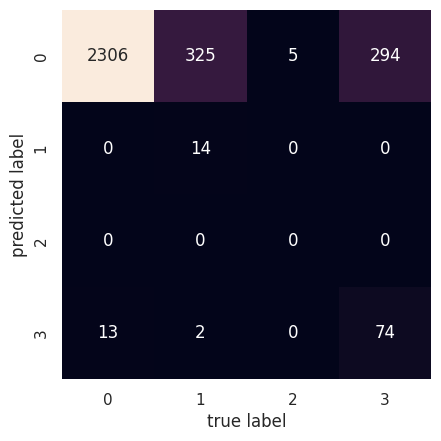

In [70]:
#Confusion Matrix
mat = confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',  cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [71]:
mat

array([[2306,    0,    0,   13],
       [ 325,   14,    0,    2],
       [   5,    0,    0,    0],
       [ 294,    0,    0,   74]])